<a href="https://colab.research.google.com/github/alifele/Brain_Computer_Interface-Competition-/blob/master/correlator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlation

Compute the correlation of two waves and then compute the total energy of the result. 

Two signals are very close to each other if the correlation is very low between them

In [0]:


import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/content/drive/My Drive/EEG_BCI/')
import datafetch
import plotters
import EEG_Lab


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
corr_result = []

In [0]:
def corr_calculator(x1, x2):
  '''
  give this function tow signals. it will compute the correlation of two signals.
  your signals can have multiple channels. in that case the correlation of the channels
  will be computed element wise (the channel number one with channel number one and etc.)
  '''


  tau = 0
  corr = []
  x1_mean = x1.mean(axis=0)
  x2_mean = x2.mean(axis=0)
  x1_std = x1.std(axis=0)
  x2_std = x2.std(axis=0)
  for tau in range(x1.shape[0]):
    corr.append(  (np.mean(np.roll(x1,tau, axis=0)*x2, axis=0) - x1_mean*x2_mean)/(x1_std*x2_std)  )

  corr = np.array(corr)


  return corr

In [0]:
t = np.linspace(0,3, 7200)
f = np.linspace(1/3, 2400, 7200)

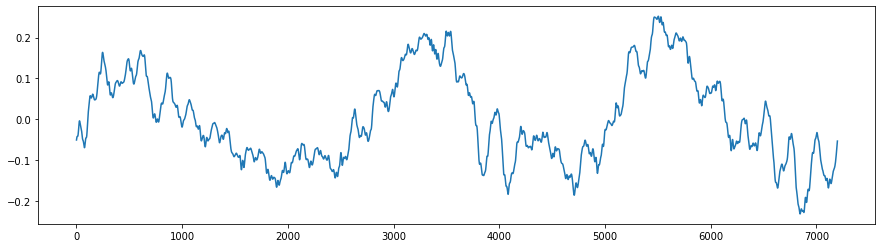

In [122]:
plt.figure(figsize=(15,4))
plt.plot(corr[:,15])

# Idea

## Correlation 1:24

In [0]:
class_2_main = subj_1['train_data_class2'][:24]
class_3_test = subj_1['train_data_class3'][-1]

In [290]:
np.shape(class_1_test)

(7200, 63)

In [0]:
main = class_2_main
test = class_2_test
all_corr = [] 
for trial in main:
  corr = corr_calculator(test, trial)
  result = np.sum(corr**2, axis=0)
  result = np.sum(result)**0.5
  all_corr.append(result)


In [164]:
np.shape(all_corr)

(24,)

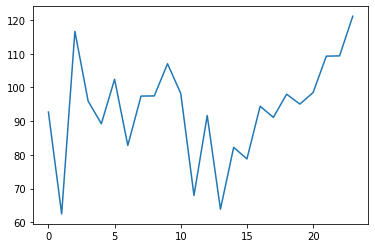

In [165]:
plt.plot(all_corr)

In [0]:
corr_result.append(np.sum(all_corr))

# the first elemnt is the correlation of the class_1_test, class_1_main

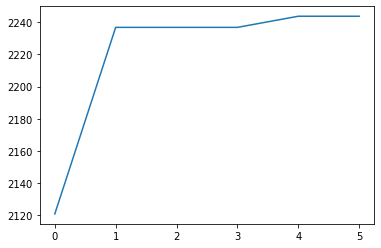

In [168]:
plt.plot(corr_result)

## Correlation 1:mean(24)

In [0]:
subj = datafetch.fetch_subject(8)

In [0]:
corr_scores_2 = []

In [0]:
class_2_main = subj_1['train_data_class2'][:24]
class_3_test = subj_1['train_data_class3'][-1]

In [0]:
subj = datafetch.fetch_subject(8)
corr_list = [ (subj['train_data_class1'][:24], subj['train_data_class1'][-1]),
              (subj['train_data_class1'][:24], subj['train_data_class2'][-1]),
              (subj['train_data_class1'][:24], subj['train_data_class3'][-1]),
              (subj['train_data_class1'][:24], subj['train_data_class4'][-1]),
              ]

In [282]:
for j in range(2):
  print(j)
  subj = datafetch.fetch_subject(j+1)
  corr_list = [ (subj['train_data_class1'][:24], subj['train_data_class1'][-1]),
                (subj['train_data_class1'][:24], subj['train_data_class2'][-1]),
                (subj['train_data_class1'][:24], subj['train_data_class3'][-1]),
                (subj['train_data_class1'][:24], subj['train_data_class4'][-1]),
                ]

  for elem in corr_list:
    all_corr = [] 
    main = elem[0].mean(axis=0)
    test = elem[1]
    for trial in [main]:

      corr_1 = corr_calculator(test, trial)
      #corr_2 = corr_calculator(test**2, trial**2)
      #corr_2 = np.abs(corr_2) ** 0.5

      corr = np.mean([corr_1, corr_2], axis=0)

      result = np.mean(corr**2, axis=0)
      result = np.sum(result)**0.5
      
      all_corr.append(result)

    corr_scores_2.append(all_corr)


0
1


In [0]:
for i in range(0,len(corr_scores_2),4):
  plt.plot(corr_scores_2[i: i+4])
  plt.plot(corr_scores_2[i:i+4], 'o')
  plt.show()

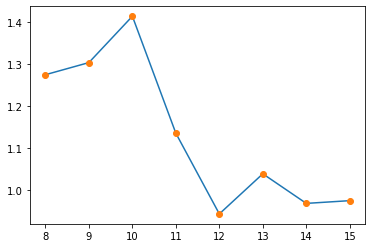

In [283]:
plt.plot(corr_scores_2)
plt.plot(corr_scores_2, 'o')

In [279]:
corr_scores_2



[[nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan]]

In [280]:
corr_2

array([[0.29771358, 0.28082532,        nan, ..., 0.2658022 , 0.19732541,
        0.14135578],
       [0.29708725, 0.29036176,        nan, ..., 0.2697908 , 0.19112107,
        0.14319944],
       [0.29748932, 0.29820573, 0.04682126, ..., 0.27680814, 0.18081667,
        0.14807752],
       ...,
       [0.3071336 , 0.24615149,        nan, ..., 0.2731897 , 0.20647086,
        0.14594765],
       [0.30269253, 0.2579102 ,        nan, ..., 0.26811346, 0.20348293,
        0.14359866],
       [0.2995548 , 0.26972312,        nan, ..., 0.26542324, 0.20094024,
        0.14176519]], dtype=float32)

In [281]:
(-1)**0.5

(6.123233995736766e-17+1j)

# Correlation with time Frequency

# Trash

In [0]:
subj = datafetch.fetch_subject(8) 

In [0]:
data = subj['train_data_class1'][18]

In [301]:
data.shape

(7200, 63)

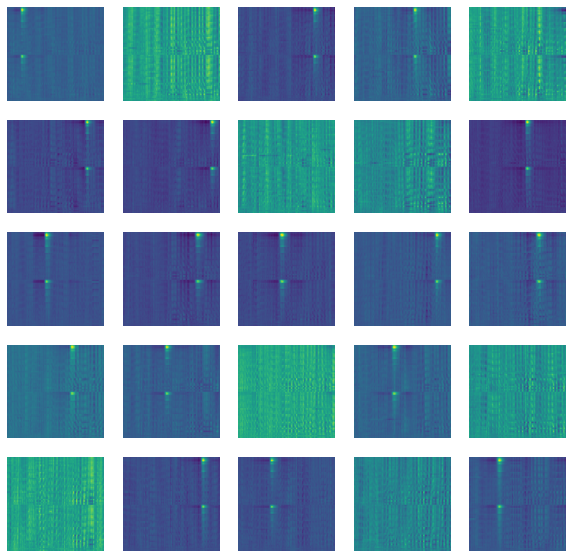

In [303]:
fig = plt.figure(figsize=(10,10))

for i in range(25):
  ax = fig.add_subplot(5,5,i+1)
  data = subj['train_data_class1'][i]
  ax.imshow(data.T, aspect='auto')
  ax.axis('off')

In [0]:
corr = corr_calculator(subj['train_data_class1'][2], subj['train_data_class1'][6])

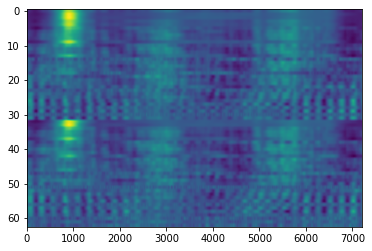

In [312]:
plt.imshow(corr.T, aspect='auto')

In [0]:
from EEG_Lab import STFT_calculator

In [0]:
data = subj['train_data_class1'][12]


(4799, 100, 63)


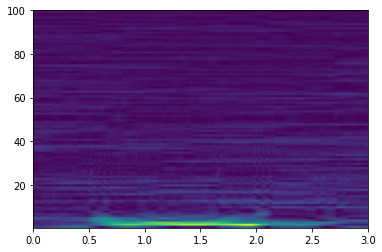

In [7]:
STFT = STFT_calculator(data, show=True, filter=True, window_size=2400, fs=2400, total_t=3, f_cut=100, channel=18)

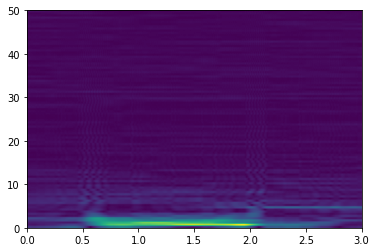

In [16]:
plt.imshow(STFT[:,:,13].T, aspect = 'auto', extent=[0,3,0,50])

In [20]:
STFT.shape, data.shape

((4799, 100, 63), (7200, 63))

In [0]:
STFT_1 = STFT_calculator(subj['train_data_class1'][12], show=True, filter=True, window_size=2400, fs=2400, total_t=3, f_cut=100, channel=18)
STFT_2 = STFT_calculator(subj['train_data_class1'][12], show=True, filter=True, window_size=2400, fs=2400, total_t=3, f_cut=100, channel=18)
Sum = 0
for i in range(63): 
  print(i)
  Sum += np.sum(np.sum(corr_calculator_image(STFT_1[:,:,i],STFT_2[:,:,i])**2))**0.5


(4799, 100, 63)
(4799, 100, 63)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [0]:
x1 = STFT[:,:,13]
x2 = STFT[:,:,15]
plt.imshow(x1.T, aspect = 'auto')
plt.show()
plt.imshow(x2.T, aspect = 'auto')

In [24]:
x1.shape, x2.shape

((4799, 100), (4799, 100))

In [0]:
plt.plot(x1[:,1])

In [0]:
mat = corr_calculator_image(x1,x2)

In [41]:
mat.shape

(4799, 100)

In [0]:
plt.imshow(mat.T, aspect='auto')

In [0]:
plt.plot(corr_calculator_image(x1[:,1], x2[:,2]))

In [0]:
def corr_calculator_image(x1, x2):
  '''
  give this function tow signals. it will compute the correlation of two signals.
  your signals can have multiple channels. in that case the correlation of the channels
  will be computed element wise (the channel number one with channel number one and etc.)
  '''


  tau = 0
  corr = []
  x1_mean = x1.mean(axis=0)
  x2_mean = x2.mean(axis=0)
  x1_std = x1.std(axis=0)
  x2_std = x2.std(axis=0)
  for tau in range(x1.shape[0]):
    corr.append(  (np.mean(np.roll(x1,tau, axis=0)*x2, axis=0) - x1_mean*x2_mean)/(x1_std*x2_std)  )

  corr = np.array(corr)


  return corr